# Overlays

Spatial overlays allow you to compare two GeoDataFrames containing polygon or multipolygon geometries 
and create a new GeoDataFrame with the new geometries representing the spatial combination *and*
merged properties. This allows you to answer questions like

> What are the demographics of the census tracts within 1000 ft of the highway?

The basic idea is demonstrated by the graphic below but keep in mind that overlays operate at the dataframe level, 
not on individual geometries, and the properties from both are retained

![illustration](http://docs.qgis.org/testing/en/_images/overlay_operations.png)

Now we can load up two GeoDataFrames containing (multi)polygon geometries...

In [1]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import GeoDataFrame, read_file
from geopandas.tools import overlay
from geodatasets import get_path

# NYC Boros
zippath = get_path("nybb")
polydf = read_file(zippath)

# Generate some circles
b = [int(x) for x in polydf.total_bounds]
N = 10
polydf2 = GeoDataFrame(
    [
        {"geometry": Point(x, y).buffer(10000), "value1": x + y, "value2": x - y}
        for x, y in zip(
            range(b[0], b[2], int((b[2] - b[0]) / N)),
            range(b[1], b[3], int((b[3] - b[1]) / N)),
        )
    ]
)

The first dataframe contains multipolygons of the NYC boros

<Axes: >

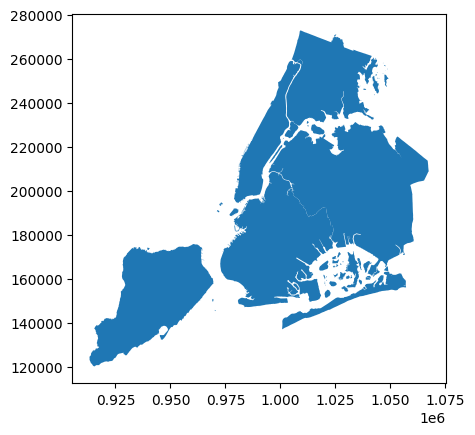

In [2]:
polydf.plot()

And the second GeoDataFrame is a sequentially generated set of circles in the same geographic space. We'll plot these with a [different color palette](https://matplotlib.org/examples/color/colormaps_reference.html).

<Axes: >

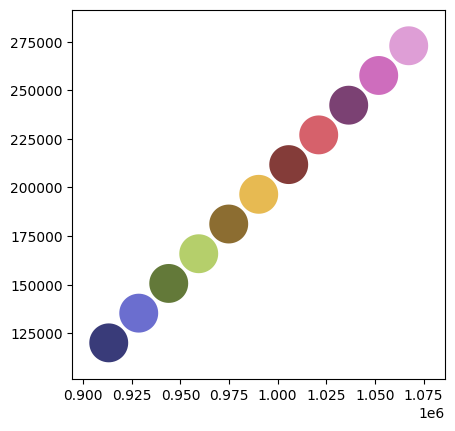

In [3]:
polydf2.plot(cmap="tab20b")

The `geopandas.tools.overlay` function takes three arguments:

* df1
* df2
* how

Where `how` can be one of:

    ['intersection',
    'union',
    'identity',
    'symmetric_difference',
    'difference']

So let's identify the areas (and attributes) where both dataframes intersect using the `overlay` method. 

C:\Users\elisec\.conda\envs\geopandas\lib\site-packages\geopandas\geodataframe.py:2469: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  return geopandas.overlay(


<Axes: >

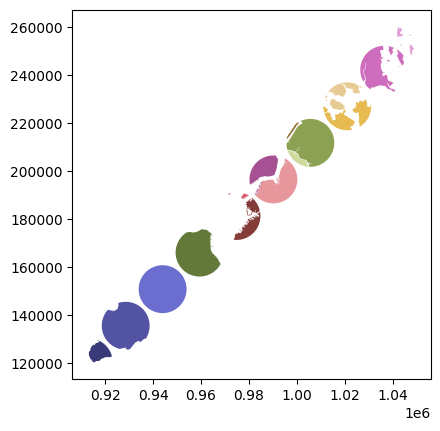

In [4]:
newdf = polydf.overlay(polydf2, how="intersection")
newdf.plot(cmap="tab20b")

And take a look at the attributes; we see that the attributes from both of the original GeoDataFrames are retained. 

In [5]:
polydf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [6]:
polydf2.head()

,geometry,value1,value2
0,"POLYGON ((923175.000 120121.000, 923126.847 11...",1033296,793054
1,"POLYGON ((938595.000 135393.000, 938546.847 13...",1063988,793202
2,"POLYGON ((954015.000 150665.000, 953966.847 14...",1094680,793350
3,"POLYGON ((969435.000 165937.000, 969386.847 16...",1125372,793498
4,"POLYGON ((984855.000 181209.000, 984806.847 18...",1156064,793646


In [7]:
newdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,value1,value2,geometry
0,5,Staten Island,330470.010332,1.623820e+09,1033296,793054,"POLYGON ((922861.155 122515.103, 922832.456 12..."
1,5,Staten Island,330470.010332,1.623820e+09,1063988,793202,"POLYGON ((936924.598 129868.857, 936896.231 12..."
2,5,Staten Island,330470.010332,1.623820e+09,1094680,793350,"POLYGON ((953966.847 149684.829, 953822.853 14..."
3,5,Staten Island,330470.010332,1.623820e+09,1125372,793498,"POLYGON ((961460.942 175472.260, 961482.499 17..."
4,4,Queens,896344.047763,3.045213e+09,1217448,793942,"POLYGON ((1005319.370 201772.684, 1005317.989 ..."


Now let's look at the other `how` operations:

C:\Users\elisec\.conda\envs\geopandas\lib\site-packages\geopandas\geodataframe.py:2469: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  return geopandas.overlay(


<Axes: >

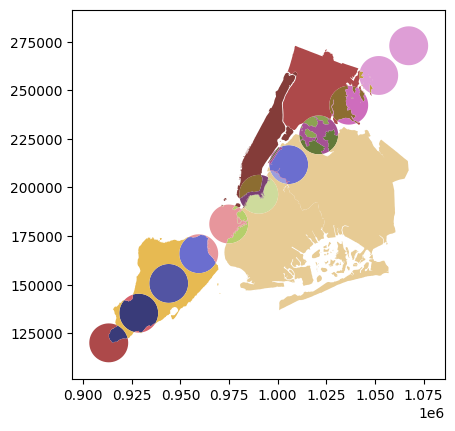

In [8]:
newdf = polydf.overlay(polydf2, how="union")
newdf.plot(cmap="tab20b")

In [ ]:
newdf = polydf.overlay(polydf2, how="identity")
newdf.plot(cmap="tab20b")

In [ ]:
newdf = polydf.overlay(polydf2, how="symmetric_difference")
newdf.plot(cmap="tab20b")

In [ ]:
newdf = polydf.overlay(polydf2, how="difference")
newdf.plot(cmap="tab20b")